## Python Library test Vanna Text - to - SQL Liberary

The contents in this notebook are tailored to validate vanna Python library that is coded to generate sql queries from textual prompts. The model is developed to generate accurate SQL queries using LLMs.

### Specifically the datasets for this test are the ten years accident data (2012 to 2021) from US DoT
* National accident data from US Department of Transportation
The csv file available is downloaded from https://www.nhtsa.gov/file-downloads?p=nhtsa/downloads/FARS/2021/National/ US DoT is loaded into a data frame which will be loaded onto sqlite database later

In [7]:
# Import the dataset and write the file to a database
import pandas as pd
import sqlite3

conn = sqlite3.connect('Vanna.sqlite')

df1 = pd.read_csv("Vanna/ACCIDENT12.txt")
df2 = pd.read_csv("Vanna/ACCIDENT13.txt")
df3 = pd.read_csv("Vanna/ACCIDENT14.txt")
df4 = pd.read_csv("Vanna/accident15.txt")
df5 = pd.read_csv("Vanna/accident16.txt")
df6 = pd.read_csv("Vanna/accident17.txt")
df7 = pd.read_csv("Vanna/accident18.txt")
df8 = pd.read_csv("Vanna/accident19.txt")
df9 = pd.read_csv("Vanna/accident20.txt")
df10 = pd.read_csv("Vanna/accident21.txt")

C:\Users\Tewbo\AppData\Local\Temp\ipykernel_13884\2649945184.py:12: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df6 = pd.read_csv("Vanna/accident17.txt")
C:\Users\Tewbo\AppData\Local\Temp\ipykernel_13884\2649945184.py:14: DtypeWarning: Columns (40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df8 = pd.read_csv("Vanna/accident19.txt")


## Data Preprocessing
#### The ten csv files are loaded onto ten dataframes and it is noted that the number of data features are different for the different dataframes. Hence, the dataframes will be merged and any missed values removed.

The details are shown below

In [8]:
print(df1.shape, df2.shape, df3.shape, df4.shape, df5.shape) 
print(df6.shape, df7.shape, df8.shape, df9.shape, df10.shape)

(31006, 50) (30202, 50) (30056, 50) (32538, 89) (34748, 91)
(34560, 91) (33919, 91) (33487, 91) (35935, 81) (39508, 80)


In [9]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)
df.shape

(335959, 92)

In [10]:
df.dropna(axis=1, inplace=True)
df.shape

(335959, 42)

In [13]:
df.rename(
    columns={'STATE':'state', 
             'ST_CASE':'state_case', 
             'VE_TOTAL':'number_of_vehicles_in_accident', 
             'VE_FORMS':'number_of_vehicle_forms',
             'PVH_INVL':'number_of_parked_vehicles_in_crash', 
             'PEDS':'pedestrians',
             'PERNOTMVIT':'number_of_persons_not_in_motor',
             'PERSONS':'number_of_people_in_motor_vehicles',
             'PERMVIT':'number_of_people_in_motor_vehicles_in_transport', 
             'COUNTY':'county_code',
             'CITY':'city_code', 
             'MONTH':'month',
             'DAY':'day_id',
             'DAY_WEEK':'day_week_code',
             'YEAR':'year',
             'HOUR':'hour',
             'MINUTE':'minute',
            'TWAY_ID':'traffic_way',
            'ROUTE':'route',
            'NHS':'national_highway_system',
            'SP_JUR':'special_jurisdiction',
            'MILEPT':'mile_point',
            'LATITUDE':'latitude',
            'LONGITUD':'longitude',
            'HARM_EV':'harmful_event',
            'MAN_COLL':'manner_of_collection',
            'RELJCT1':'relation_to_junction',
            'RELJCT2':'relation_to_interchange',
            'TYP_INT':'type_of_intersection',
             'REL_ROAD':'relation_to_trafficway',
            'WRK_ZONE':'work_zone',
            'LGT_COND':'light_condition',
            'WEATHER':'weather_condition',
            'SCH_BUS':'school_bus_related',
            'RAIL':'rail_grade_crossing',
            'NOT_HOUR':'hour_of_notification',
            'NOT_MIN':'minute_of_notification',
            'ARR_HOUR':'hour_of_arrival_at_scene',
            'ARR_MIN':'minute_of_arrival_at_scene',
            'HOSP_HR':'hour_of_emergency_medical_serive_arrival',
            'HOSP_MN':'minute_of_emergency_medical_serive_arrival',
            'FATALS':'number_of_fatals'
            }, inplace=True)

## Loading the data frame onto sqlite database

The merged data frame will be written onto a sqlite database using sqlite3 connection. The ten years data has 335,959 observations.

In [15]:
df.to_sql("Accident_data", con=conn)

335959

### Import vanna
#### Connect to Databases 


In [16]:
# Importing the liberary and modules
import vanna as vn

### Create new model and use api key from Vanna.AI

In [17]:
# Api key
from vanna.remote import VannaDefault
vn = VannaDefault(model='tew_model', api_key='0f93bfb81ac543d691b7ec099d38bb4c')
vn.connect_to_sqlite('Vanna.sqlite') 

In [18]:
training_data = vn.get_training_data()
training_data

,id,training_data_type,question,content
0,205202-sql,sql,What is the total number of record?,SELECT count(*) from accident_database
1,59093-ddl,ddl,None,CREATE TABLE IF NOT EXISTS accident_database (...
2,205219-sql,sql,What is the trend of fatality over time?,"SELECT year, sum(number_of_fatals) AS total_fa..."
3,242883-doc,documentation,None,"""This database is for accident data of US stat..."
4,59088-ddl,ddl,None,CREATE TABLE IF NOT EXISTS accident_database (...
5,242884-doc,documentation,None,It was very amazing
6,205203-sql,sql,What is the total number of fatals?,SELECT sum(number_of_fatals) from accident_dat...
7,59090-ddl,ddl,None,CREATE TABLE IF NOT EXISTS accident_database (...
8,59089-ddl,ddl,None,CREATE TABLE IF NOT EXISTS accident_database (...
9,205188-sql,sql,How many total accidents have been recorded in...,SELECT count(*) FROM accident_database


### Training the model

In [19]:
vn.train(ddl="""CREATE TABLE IF NOT EXISTS accident_data (state TEXT, state_case INT, pedestrians INT, 
         number_of_persons_not_in_motor INT, 
         number_of_vehicles_in_accident INT, 
         number_of_vehicle_forms INT,
         number_of_parked_vehicles_in_crash INT, 
         number_of_people_in_motor_vehicles INT,
        number_of_people_in_motor_vehicles_in_transport INT, 
        county TEXT, 
        city TEXT,  month TEXT, day TEXT, day_week TEXT,
        year INT, hour INT, minute INT, 
        traffic_way INT, intersection_related TEXT,
         route INT, urban_rural_classification TEXT, functional_system TEXT,
         roadway_ownership TEXT, national_highway_system TEXT,
        special_jurisdiction TEXT, mile_point TEXT,
        latitude TEXT, longitude TEXT,
        harmful_event TEXT, manner_of_collection TEXT,
        relation_to_junction TEXT, relation_to_interchange TEXT,
        type_of_intersection TEXT,
        relation_to_trafficway TEXT, work_zone TEXT,
        light_condition TEXT, weather_condition TEXT, school_bus_related TEXT,
        rail_grade_crossing TEXT, hour_of_notification INT,
        minute_of_notification INT,
        hour_of_arrival_at_scene INT, minute_of_arrival_at_scene INT,
        hour_of_emergency_medical_serive_arrival INT,
        minute_of_emergency_medical_serive_arrival INT,
        number_of_fatals INT)""")

Adding ddl: CREATE TABLE IF NOT EXISTS accident_data (state TEXT, state_case INT, pedestrians INT, 
         number_of_persons_not_in_motor INT, 
         number_of_vehicles_in_accident INT, 
         number_of_vehicle_forms INT,
         number_of_parked_vehicles_in_crash INT, 
         number_of_people_in_motor_vehicles INT,
        number_of_people_in_motor_vehicles_in_transport INT, 
        county TEXT, 
        city TEXT,  month TEXT, day TEXT, day_week TEXT,
        year INT, hour INT, minute INT, 
        traffic_way INT, intersection_related TEXT,
         route INT, urban_rural_classification TEXT, functional_system TEXT,
         roadway_ownership TEXT, national_highway_system TEXT,
        special_jurisdiction TEXT, mile_point TEXT,
        latitude TEXT, longitude TEXT,
        harmful_event TEXT, manner_of_collection TEXT,
        relation_to_junction TEXT, relation_to_interchange TEXT,
        type_of_intersection TEXT,
        relation_to_trafficway TEXT, work_zone TEXT

'59149-ddl'

## Inform the model about the dataset through the documentation

In [20]:
vn.train(documentation=""""This database is a ten year record of accident data from 2012 to 2021 in all states of the 
US states of America as compiled and availed by Department of Transportation""")

Adding documentation....


'243407-doc'

## Train the model through question - sql pairs

In [36]:
vn.train(question = "In which top ten states are the most accidents recorded based on accident database?",
sql = """SELECT state, count(*) AS records 
FROM accident_data 
GROUP BY state 
ORDER BY records DESC
LIMIT 10""")

'4d6e59997c9feaa934b34bb445b3570c-sql'

In [23]:
vn.train(question="What is the trend of accident data over years?",
sql="""SELECT year, count(*) AS records FROM accident_data GROUP BY year ORDER BY year""")

'2e85183477e89a5e6274f507b4834e5b-sql'

In [24]:
vn.train(question="What is the total number of fatalities caused by accidents during the entire ten years?",
sql = """SELECT sum(number_of_fatals) AS total_fatalities FROM accident_data""")

'5f980e8bae9e2fe12630018992f309f0-sql'

In [25]:
vn.train(question="What are the top ten states with high total fatality records?",
sql="""SELECT state, sum(number_of_fatals) AS records 
FROM accident_data GROUP BY state ORDER by records DESC LIMIT 10""")

'2f6421cd71f08a06a5e2a6b77be1aea8-sql'

In [26]:
vn.train(question="What is the relation of number of accidents with weather condition?",
sql="""SELECT weather, count(*) AS records 
FROM accident_data GROUP BY WEATHER ORDER by records DESC LIMIT 10""")

'9cd7da770b88b585837a53187efacb10-sql'

In [27]:
vn.train(question="What is the relation of accidents with the lighting condition?",
sql="""SELECT light_condition, count(*) AS records 
FROM accident_data GROUP BY light_condition ORDER BY records DESC""")

'9ce9b4bac1a560f09d9b7f1598fbc11b-sql'

In [28]:
vn.train(
    question='Which three national highway system has the most frequent accident?',
    sql='''SELECT national_highway_system, count(*) AS nhs 
    from accident_data group by national_highway_system order by nhs LIMIT 3''')

'727750a8b84849e6ac3ae558f315f444-sql'

In [46]:
vn.train(    
    question='What are the top ten cities having high accident number?',
    sql='''SELECT city_code, count(*) AS cases_in_city 
    from accident_data group by city_code order by cases_in_city DESC limit 10''')

'acec1a1a9c0bac704dda946e1c982f61-sql'

In [45]:
vn.train(
    question='What is the total number of records?',
    sql='''SELECT count(*) from accident_data''')

'30ced039da07d5fbcc07dfcaa6d5f366-sql'

In [31]:
vn.train(
    question='What is the total number of fatalities by county?',
    sql='''SELECT county_code, count(*) from accident_data GROUP BY county_code''')

'1127d9d955885c9d1370710997909385-sql'

In [32]:
vn.train(
    question='What are the top ten states with accident record?',
    sql='''SELECT count(*) AS cases_in_states from accident_data group by state order by cases_in_states limit 10''')

'37700c8e67f3522afe5ab7d0abbd95f3-sql'

## Prompt the model informations to give information from its learning

SELECT year, sum(number_of_fatals) AS total_fatalities
FROM accident_data
GROUP BY year
ORDER BY year ASC
   year  total_fatalities
0  2012             33782
1  2013             32893
2  2014             32744
3  2015             35484
4  2016             37806
5  2017             37473
6  2018             36835
7  2019             36355
8  2020             39007
9  2021             42939


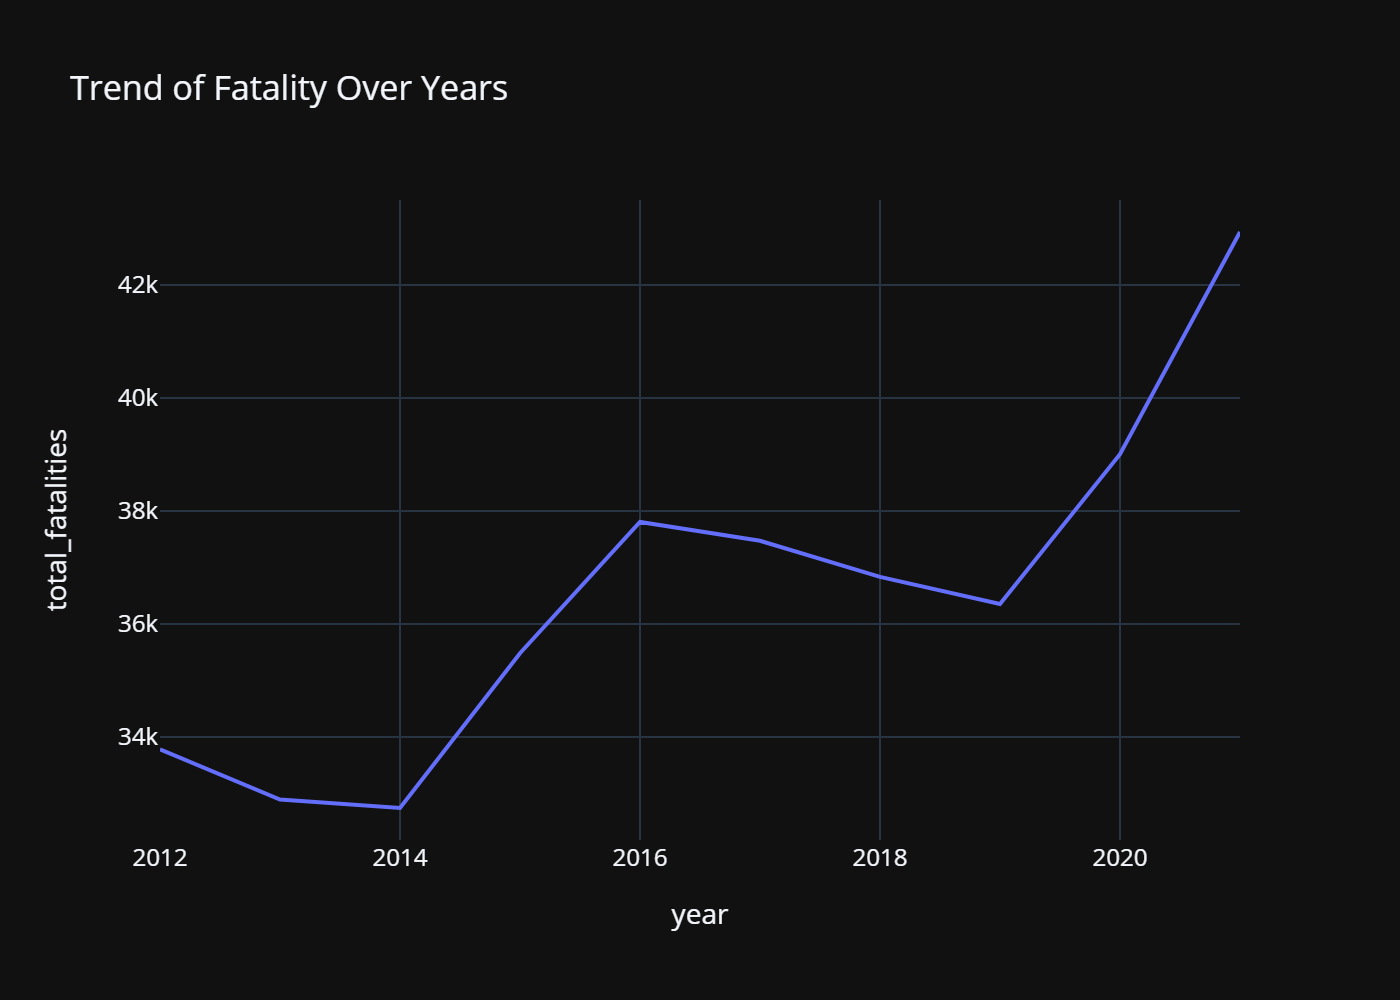

('SELECT year, sum(number_of_fatals) AS total_fatalities\nFROM accident_data\nGROUP BY year\nORDER BY year ASC',
    year  total_fatalities
 0  2012             33782
 1  2013             32893
 2  2014             32744
 3  2015             35484
 4  2016             37806
 5  2017             37473
 6  2018             36835
 7  2019             36355
 8  2020             39007
 9  2021             42939,
 None)

In [33]:
# Prompt for LLM response
vn.ask('What is the trend of fatality over years?')

SELECT weather_condition, count(*) AS accidents_count 
FROM accident_data 
GROUP BY weather_condition 
ORDER BY accidents_count DESC
    weather_condition  accidents_count
0                   1           237293
1                  10            50342
2                   2            23981
3                  98            13075
4                   5             3823
5                   4             3575
6                  99             1646
7                   3              680
8                   6              514
9                   8              412
10                 11              273
11                 12              230
12                  7              115


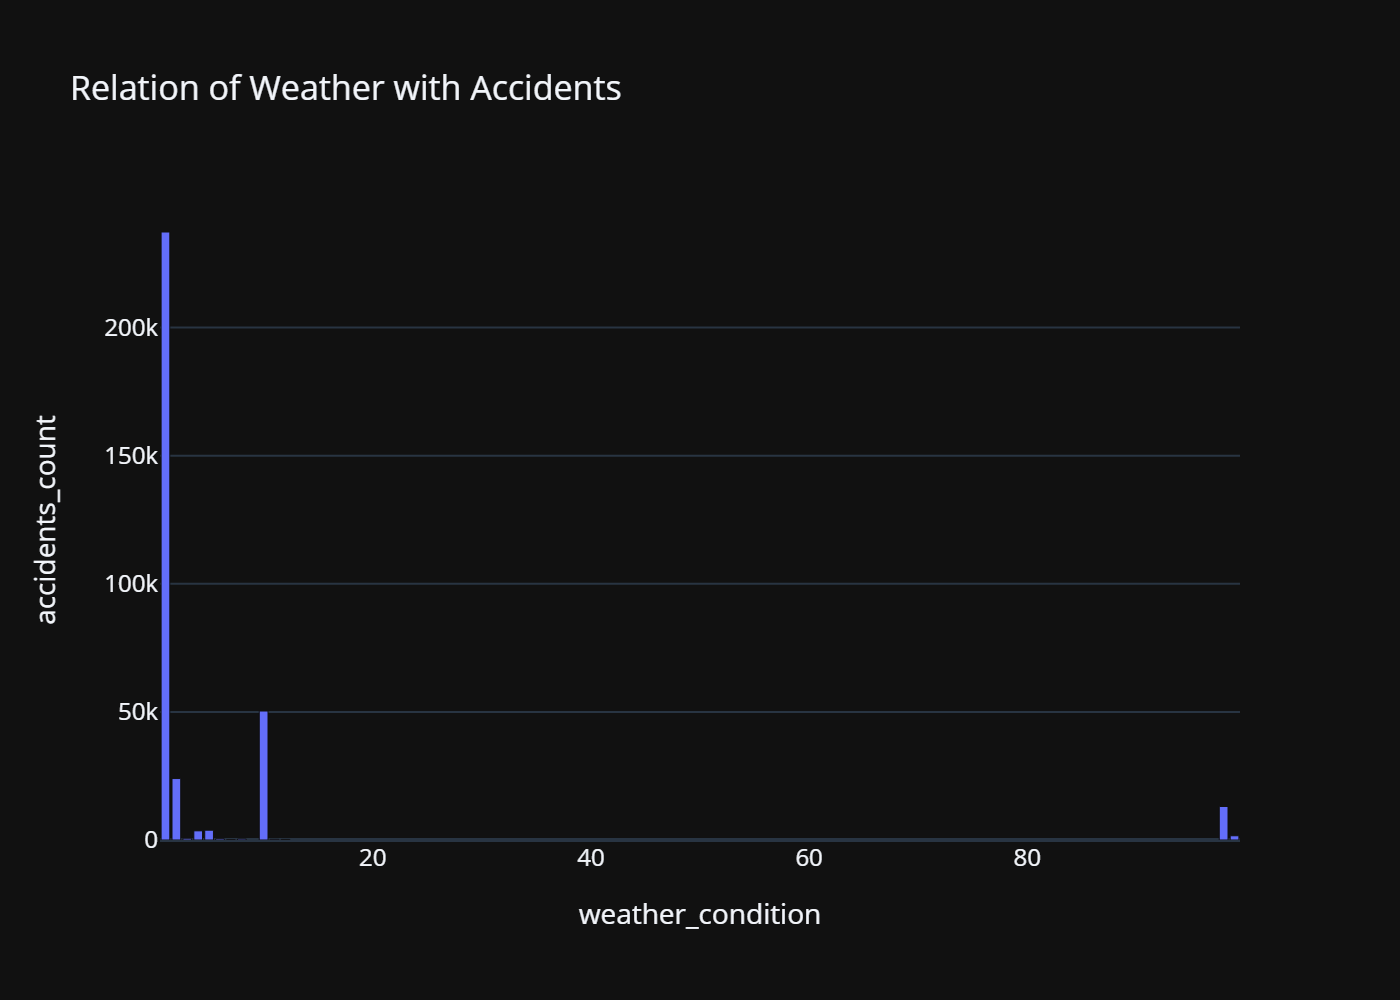

('SELECT weather_condition, count(*) AS accidents_count \nFROM accident_data \nGROUP BY weather_condition \nORDER BY accidents_count DESC',
     weather_condition  accidents_count
 0                   1           237293
 1                  10            50342
 2                   2            23981
 3                  98            13075
 4                   5             3823
 5                   4             3575
 6                  99             1646
 7                   3              680
 8                   6              514
 9                   8              412
 10                 11              273
 11                 12              230
 12                  7              115,
 None)

In [34]:
# Prompt for LLM response
vn.ask('What is the relation of weather with accidents?')

SELECT state, sum(number_of_fatals) AS records 
FROM accident_data GROUP BY state ORDER by records DESC LIMIT 10
   state  records
0     48    37085
1      6    36065
2     12    29945
3     13    14516
4     37    14208
5     42    11848
6     39    11342
7     47    10716
8     36    10706
9     17    10608


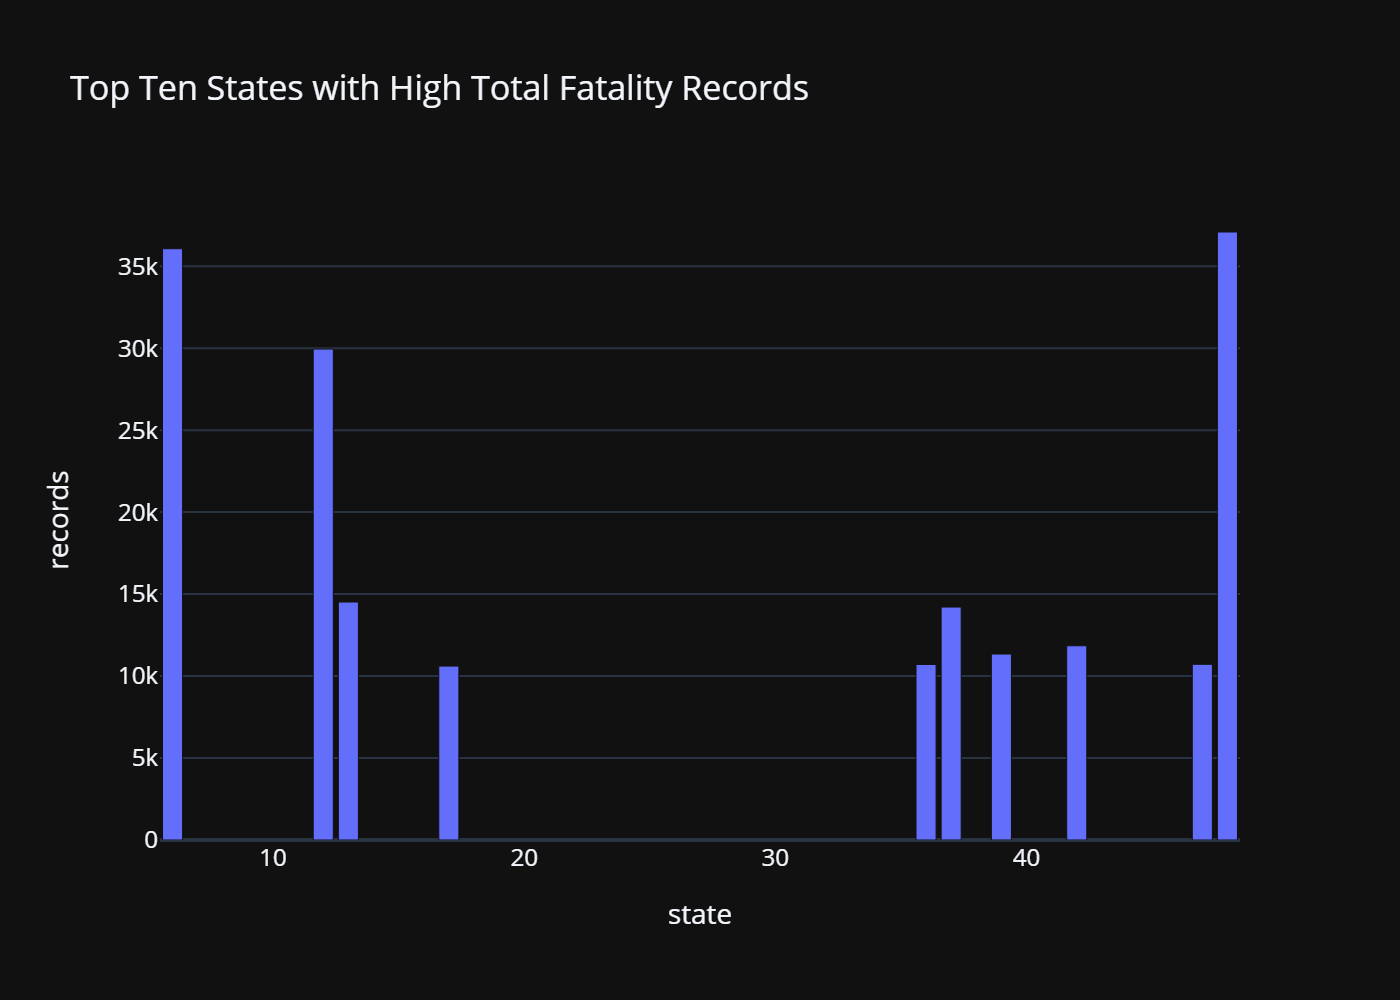

('SELECT state, sum(number_of_fatals) AS records \nFROM accident_data GROUP BY state ORDER by records DESC LIMIT 10',
    state  records
 0     48    37085
 1      6    36065
 2     12    29945
 3     13    14516
 4     37    14208
 5     42    11848
 6     39    11342
 7     47    10716
 8     36    10706
 9     17    10608,
 None)

In [38]:
vn.ask("What are the top ten states with high total fatality records?")

SELECT count(*) from accident_data
   count(*)
0    335959


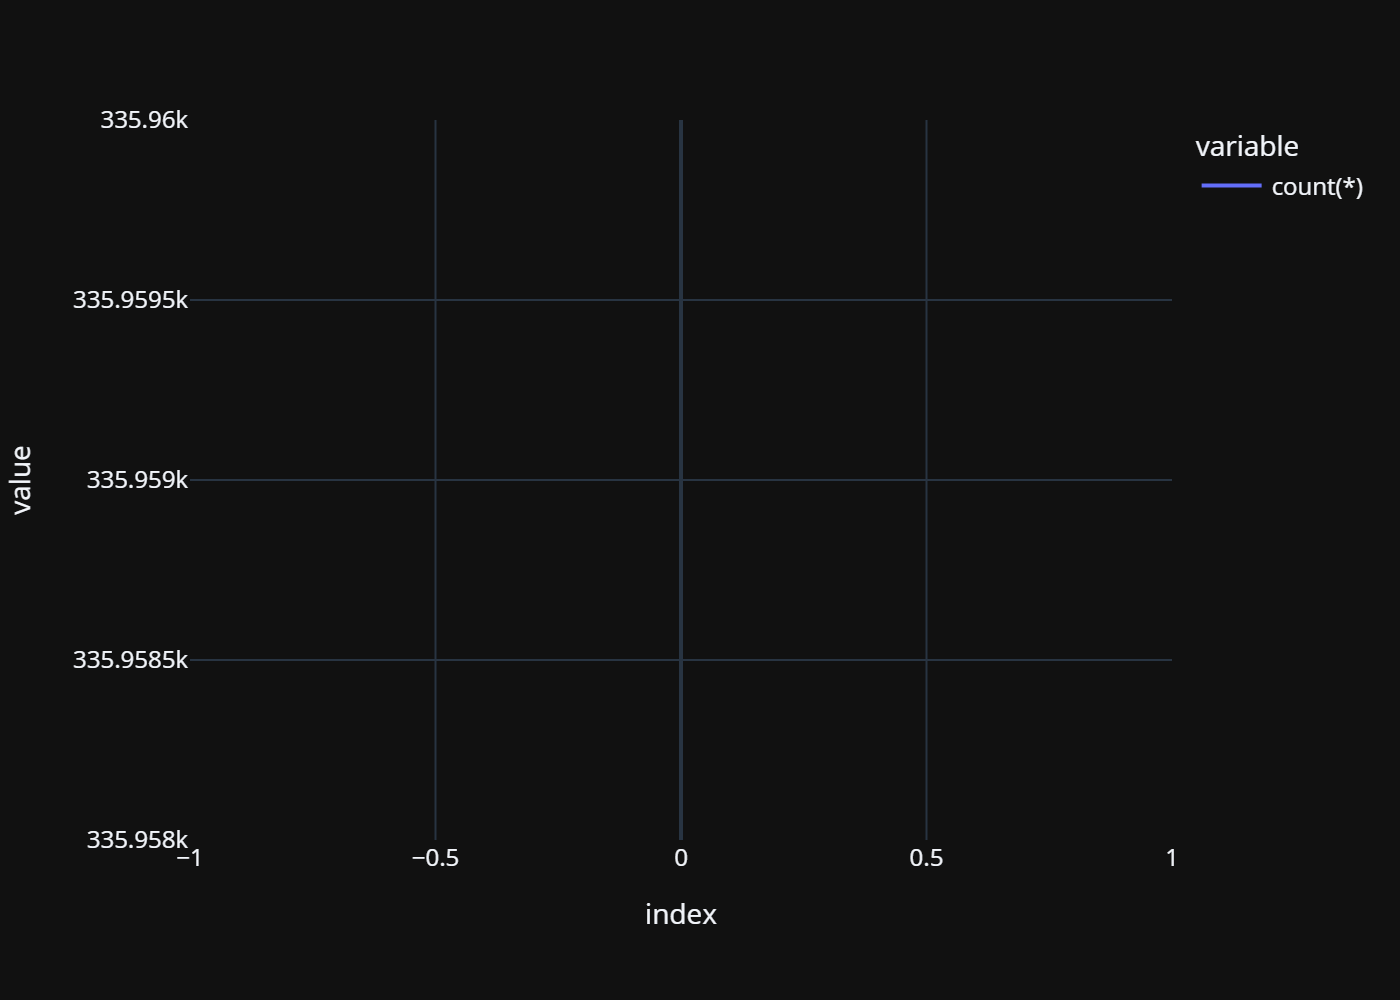

('SELECT count(*) from accident_data',
    count(*)
 0    335959,
 None)

In [39]:
vn.ask('What is the total number of records?')

SELECT light_condition, count(*) AS records 
FROM accident_data GROUP BY light_condition ORDER BY records DESC
   light_condition  records
0                1   158259
1                2    93481
2                3    65640
3                5     7903
4                4     6329
5                6     2401
6                9     1401
7                8      399
8                7      146


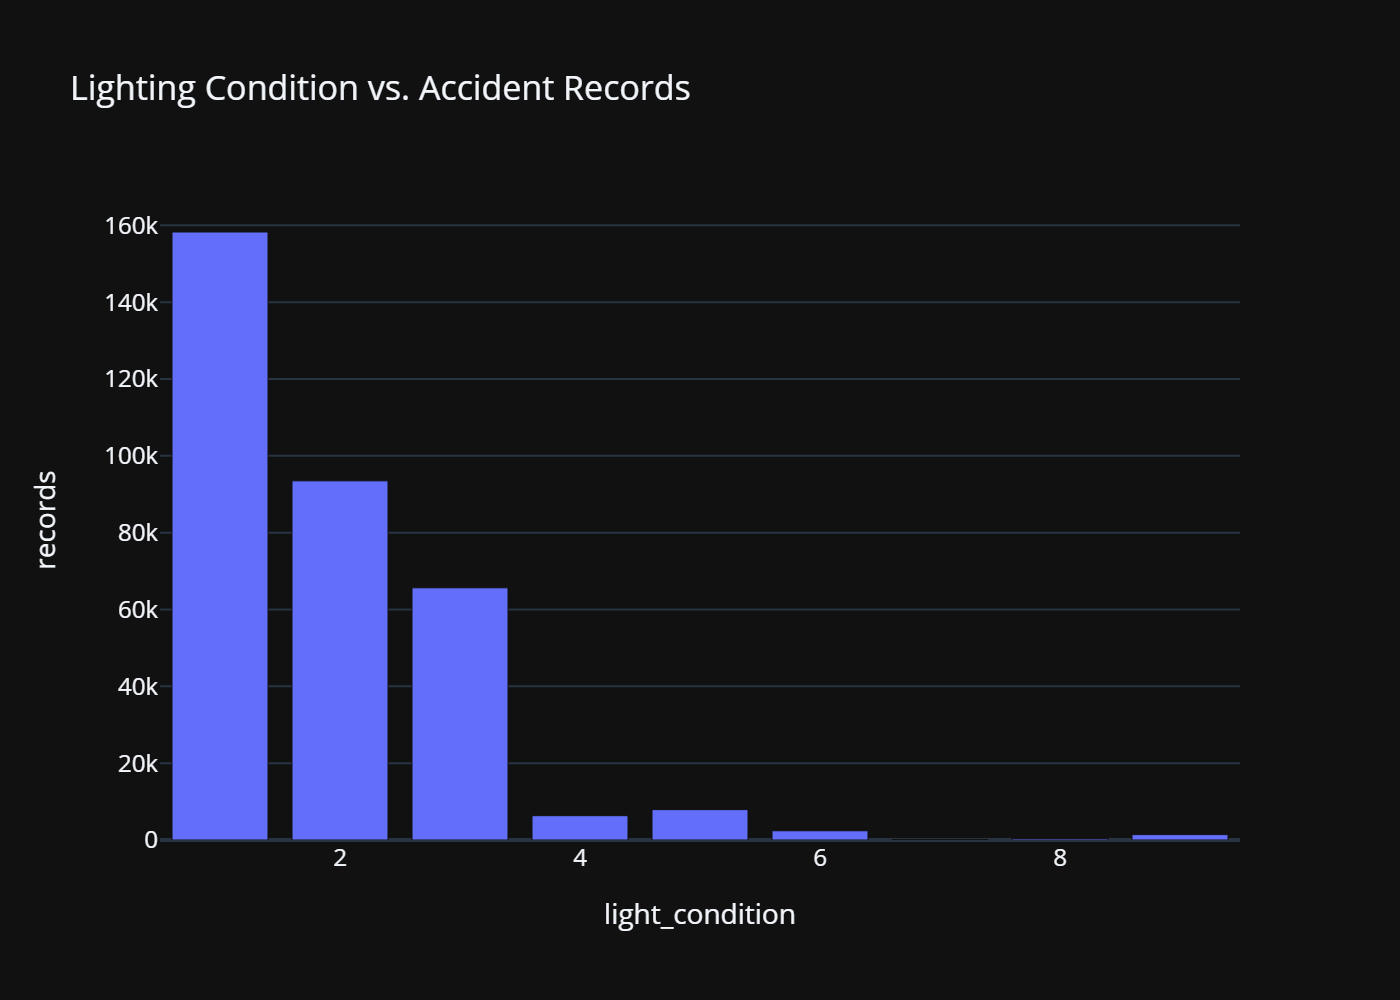

('SELECT light_condition, count(*) AS records \nFROM accident_data GROUP BY light_condition ORDER BY records DESC',
    light_condition  records
 0                1   158259
 1                2    93481
 2                3    65640
 3                5     7903
 4                4     6329
 5                6     2401
 6                9     1401
 7                8      399
 8                7      146,
 None)

In [50]:
vn.ask("What is the relation of accidents with the lighting condition?")